# Detect credit fraud using unsupervised learning

.outlier detection task -> DBSCAN

In [3]:
import pandas as pd

In [4]:
df =pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Apply DBSCAN

In [9]:
X = df.drop('Class',axis=1)

In [10]:
X.shape

(284807, 30)

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # standardization

In [13]:
import numpy as np

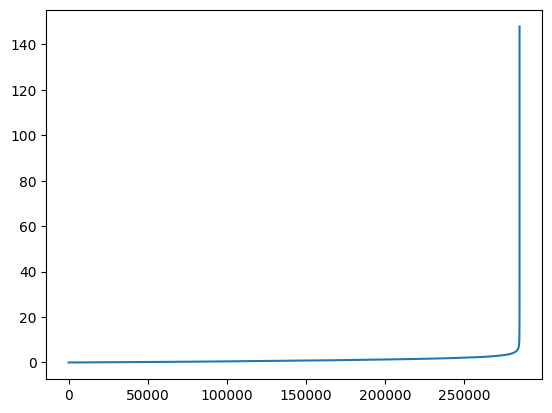

In [14]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [1]:
y_pred = DBSCAN(eps=0.3, min_samples=5).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))

Here because of size of data DBSCAN is not working. so solution is undersample data

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
df_class0 =df[df['Class']==0].sample(10000)

In [13]:
df_class1 =df[df['Class']==1]

In [14]:
df_class0.shape,df_class1.shape

((10000, 31), (492, 31))

In [16]:
df_sample=pd.concat([df_class0,df_class1])

In [17]:
df_sample.shape

(10492, 31)

In [18]:
X = df.drop('Class',axis=1)

In [19]:
X.shape



(284807, 30)

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # standardization

In [ ]:
y_pred = DBSCAN(eps=7, min_samples=5).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
